In [107]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from src.algorithms import algorithms, search_algorithm
from src.sokoban import SokobanBoard, SokobanAction

## Functions

In [108]:
def open_board(board_path):
    with open(board_path, "r") as f:
        board = SokobanBoard.board_builder(f.read())
    return board

In [124]:
def exec_times(algorithm, board, iters = 20):
    execution_times = np.empty(iters)
    for i in range(0, iters):
        start_time = time.time()
        result = search_algorithm(
            board,
            [SokobanAction.UP, SokobanAction.DOWN, SokobanAction.LEFT, SokobanAction.RIGHT],
            algorithms[algorithm]
        )
        execution_times[i] = time.time() - start_time
    return execution_times*1000

In [119]:
def exec_times_per_algorithm(algorithms, board, iters=20):
    execution_times = {}
    for algorithm in algorithms:
        execution_times[algorithm] = exec_times(algorithm, board, iters)
    return execution_times

In [121]:
def exec_times_per_algorithm_and_board(algorithms, boards, iters=20):
    execution_times_per_board = []
    for board in boards:
        execution_times_per_board.append(exec_times_per_algorithm(algorithms, board, iters))
    return execution_times_per_board

In [140]:
def plot_exec_times(board_names, execution_times_per_algorithm_and_board):
    for (board, execution_times) in zip(board_names, execution_times_per_algorithm_and_board):
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=pd.DataFrame(execution_times))
        plt.xlabel("Algorithm")
        plt.ylabel("Execution Time (ms)")
        plt.title(f"Execution Time Comparison for {board}")
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.grid(True, linestyle="--", alpha=0.6)
        
    plt.show()

In [147]:
def plot_search_statistics(boards, board_names, algorithm_names):
    for i, board in enumerate(boards):
        expanded_nodes = []
        remaining_nodes = []
        max_nodes = []
        labels = []
        
        for algo_name in algorithm_names:
            _, exp_nodes, rem_nodes, max_n = search_algorithm(
                board,
                [SokobanAction.UP, SokobanAction.DOWN, SokobanAction.LEFT, SokobanAction.RIGHT],
                algorithms[algo_name]
            )
            labels.append(algo_name.capitalize())
            expanded_nodes.append(exp_nodes)
            remaining_nodes.append(rem_nodes)
            max_nodes.append(max_n)
        
        x = np.arange(len(labels))  # Posiciones para las etiquetas
        width = 0.3  # Ancho de las barras
        
        fig, ax = plt.subplots(figsize=(20, 8))
        rects1 = ax.bar(x - width, expanded_nodes, width, label='Expanded Nodes', color='#4C72B0')
        rects2 = ax.bar(x, remaining_nodes, width, label='Remaining Nodes', color='#DD8452')
        rects3 = ax.bar(x + width, max_nodes, width, label='Max Nodes', color='#55A868')
        
        ax.set_xlabel('Algorithms')
        ax.set_ylabel('Number of Nodes')
        ax.set_title(f'Search Algorithm Performance on Board {i}')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        
        plt.show()

## Results

In [149]:
board_names = ['board1', 'board2']
boards = []
for bn in board_names:
    boards.append(open_board(f'boards/{bn}.txt'))

In [122]:
execution_times_per_board = exec_times_per_algorithm_and_board(algorithms.keys(), boards)

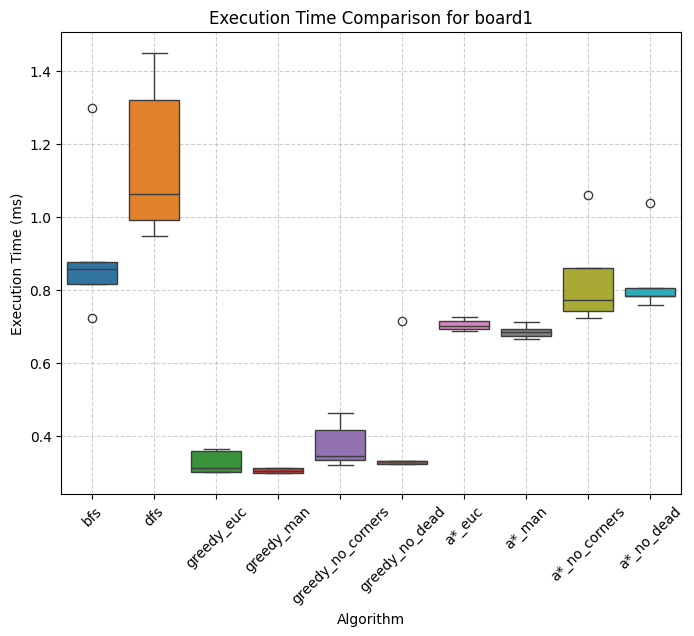

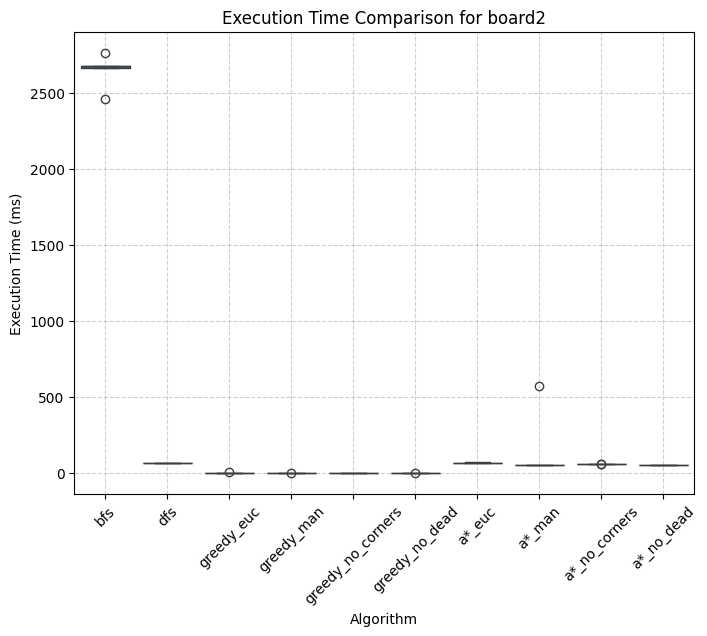

In [84]:
plot_exec_times(board_names, execution_times_per_board)

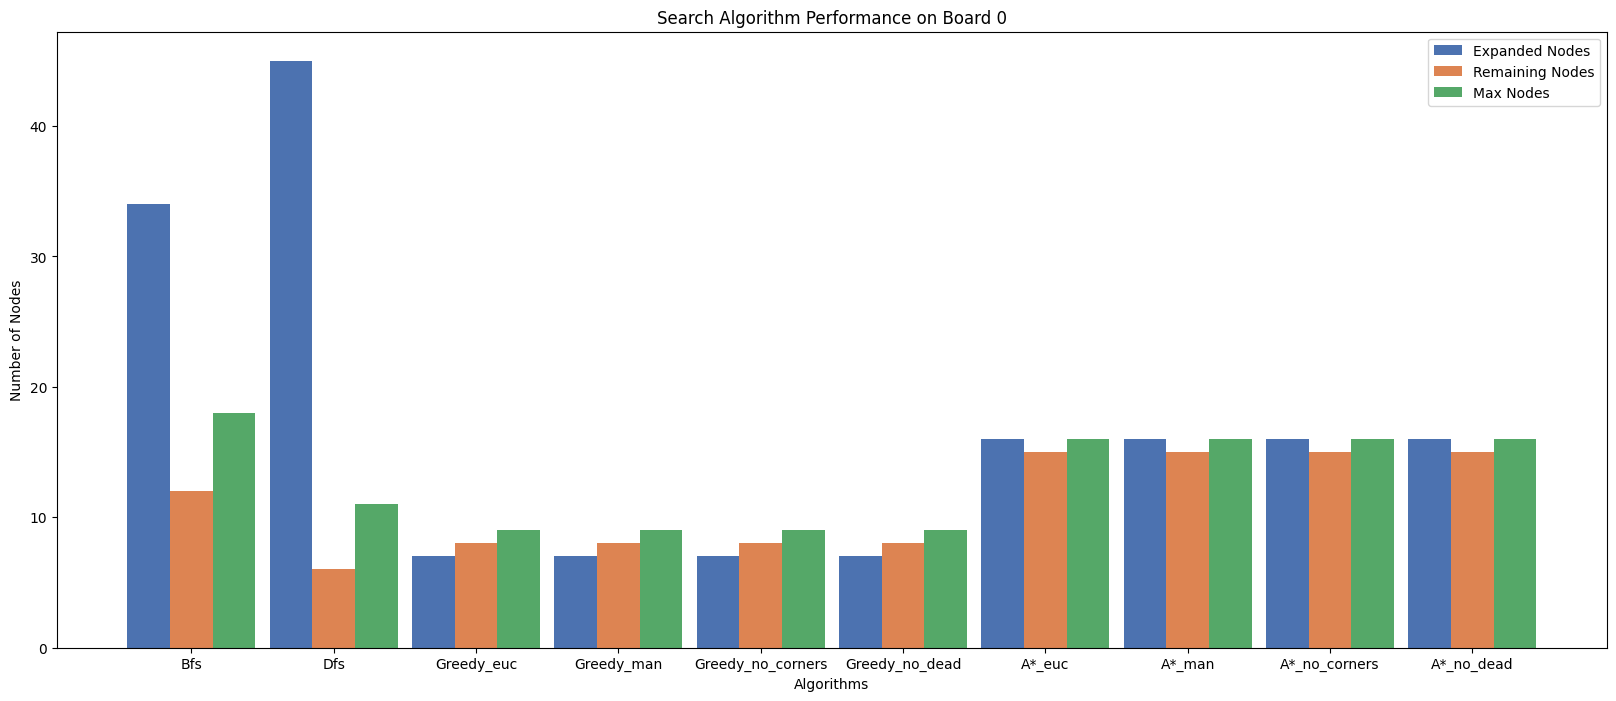

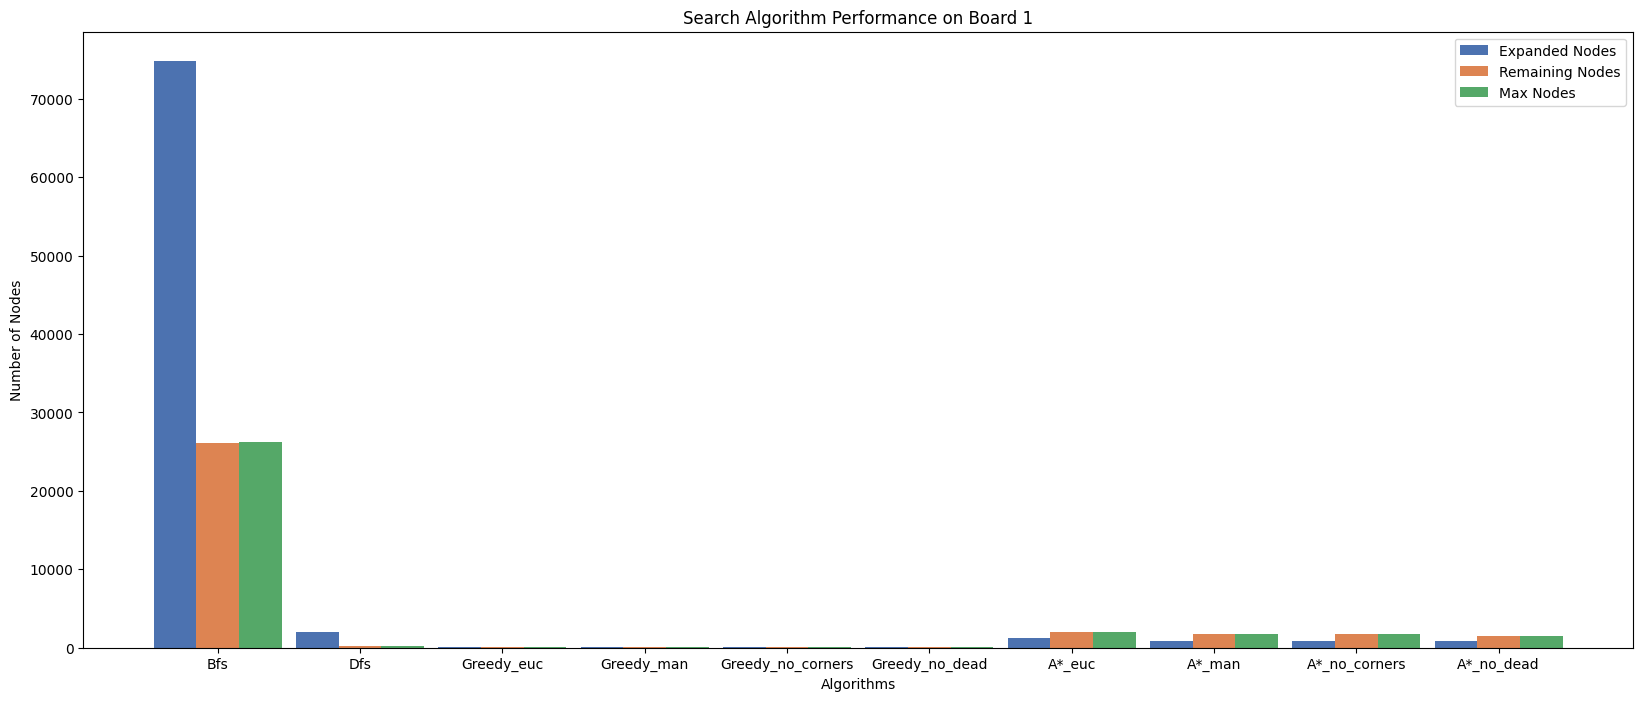

In [150]:
plot_search_statistics(boards, board_names, algorithms.keys())

In [136]:
board_names = ['board1', 'board2', 'board3']
boards = []
for bn in board_names:
    boards.append(open_board(f'boards/{bn}.txt'))

In [138]:
algos = [algo for algo in algorithms.keys() if algo != 'bfs' and algo != 'dfs']
execution_times_per_board = exec_times_per_algorithm_and_board(algos, boards, iters=10)

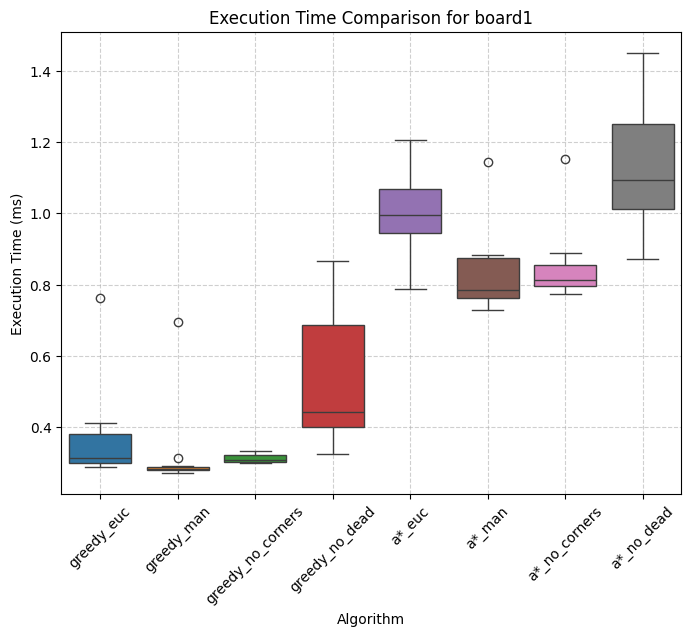

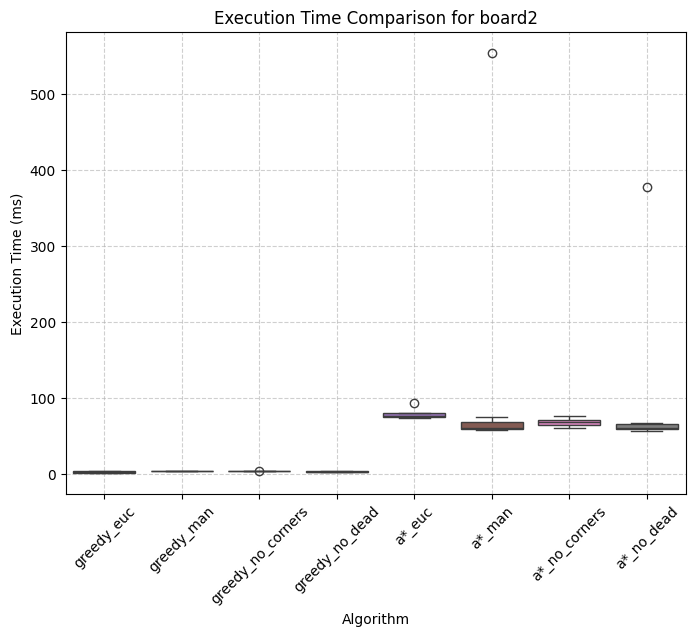

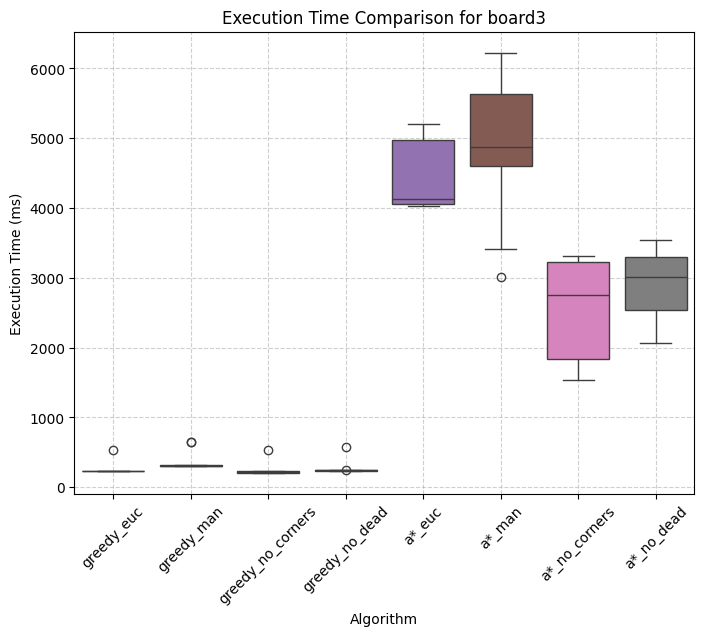

In [141]:
plot_exec_times(board_names, execution_times_per_board)

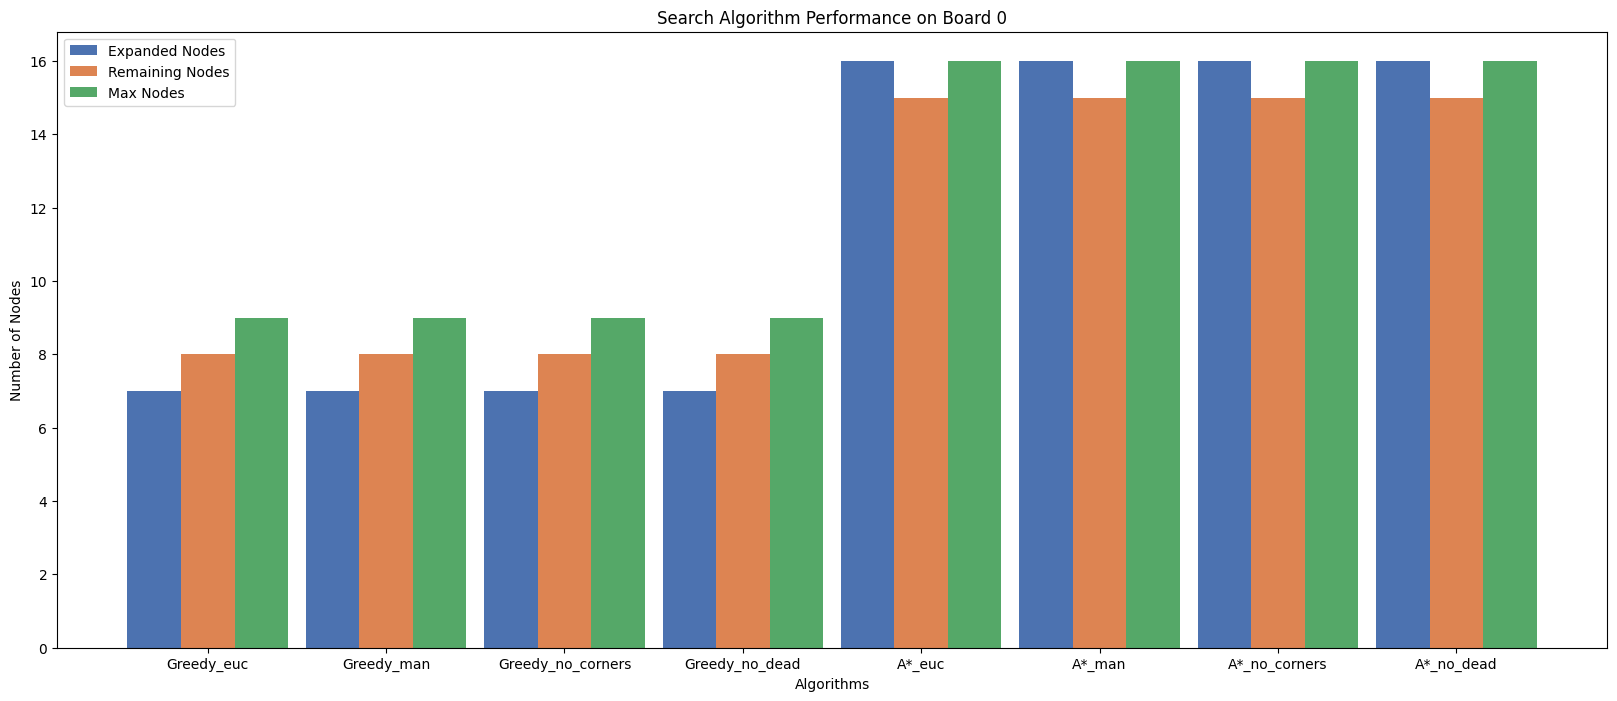

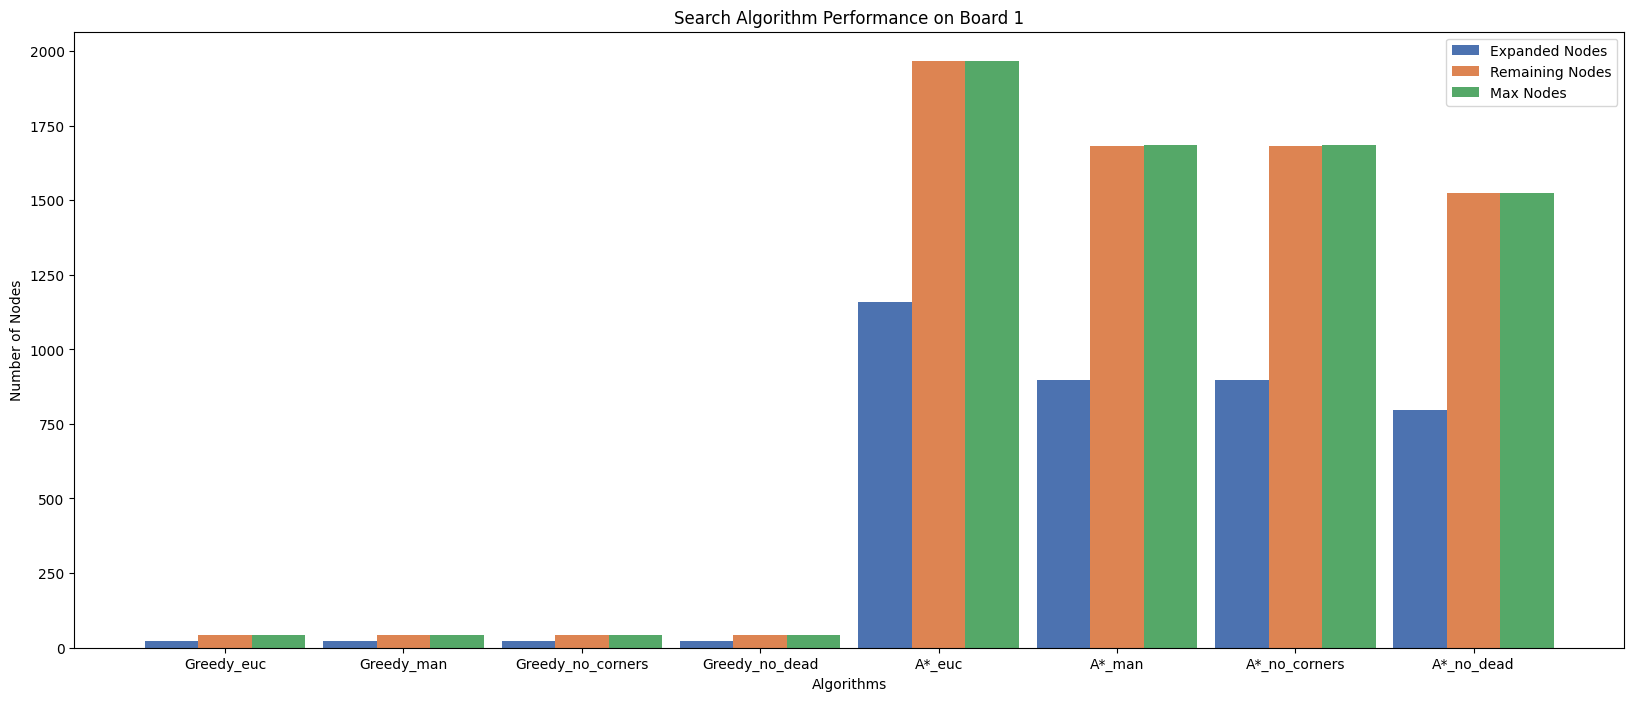

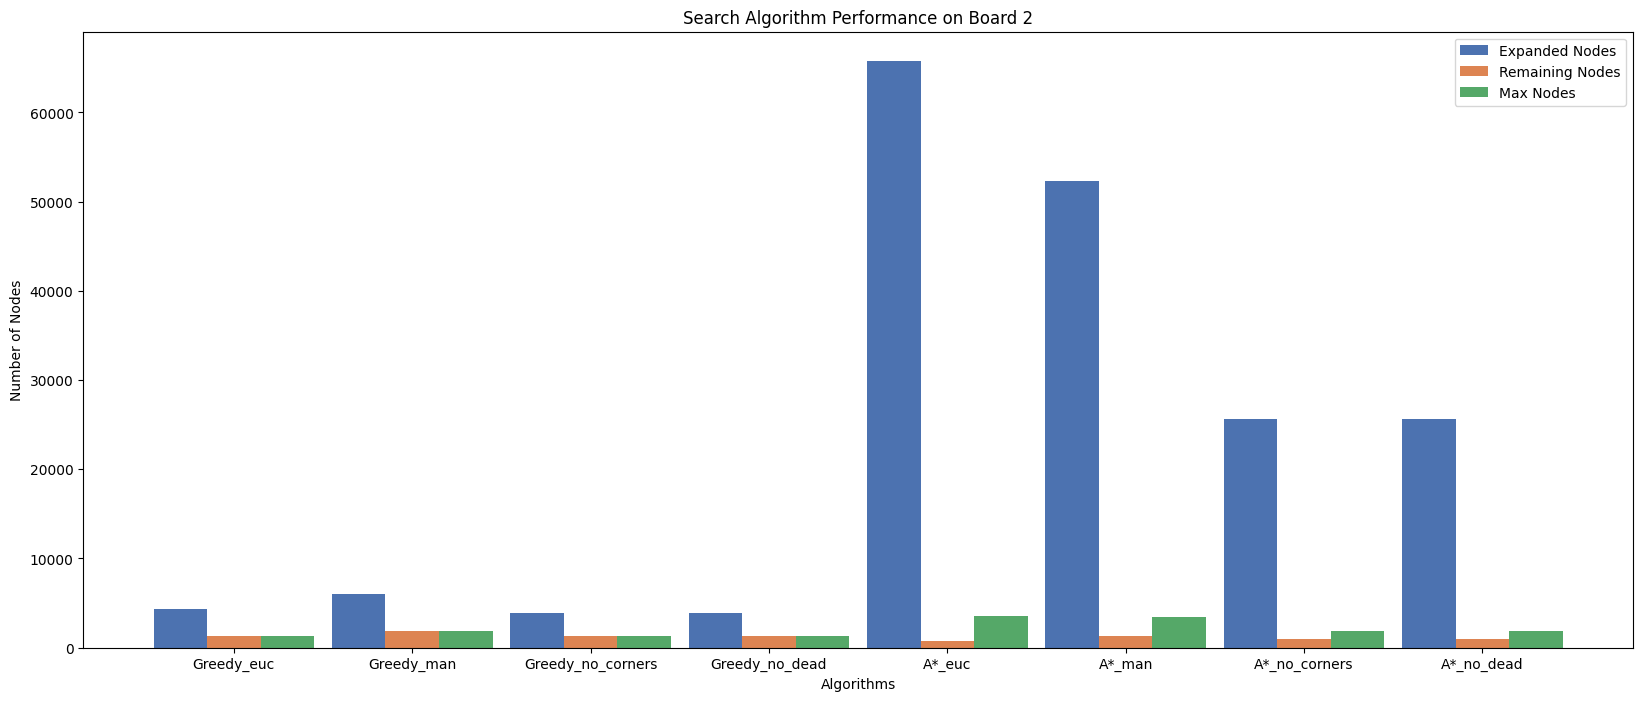

In [148]:
plot_search_statistics(boards, board_names, algos)